# Gravità terrestre
Dalle equazioni della dinamica il moto del pendolo, per piccoli angoli, può essere approssimato ad un oscillatore armonico con periodo dato dalla formula:

$$ T = 2\pi\sqrt\frac{l}{g}$$

Possiamo quindi ottenere il valore della costante di gravità esplicitando $g$ nella precedente formula.

$$ g = 4\pi^2\frac{l}{T^2}$$

Il che significa che è possibile stimare la gravità terrestre partendo dalla misura del periodo di oscillazione del pendolo.
Supponendo che non ci siano smorzamenti dovuti all'attrito il periodo del pendolo rimarrà pressochè costante: conviene prendere il valore $\tau = 5T$ in modo da avere un'incertezza statistica minore.

In [2]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

# import the data 
tof = pd.read_csv("data.csv", delimiter=" ")

In [3]:
# get the values without duplicates
filter_values = tof["l"].unique()
# remove 100 from the list
filter_values = filter_values[filter_values != 100]
print(filter_values)

stacked = np.zeros((0,10))

for i in filter_values:
    values = tof[tof["l"] == i]["tau"].values
    # print(values)
    stacked = np.append(stacked, [values], axis=0)
    
print(stacked)

# print the latex code 
if(True):
    mstr = ""
    for row in range(10):
        for col, fil in enumerate(filter_values):
            mstr = mstr + f"${stacked[col,row]}$ & "
        mstr = mstr[: -2]
        mstr += "\\\\\n"
        
    print(mstr)


[ 30  60 120 150]
[[ 5.43  5.55  5.47  5.43  5.55  5.46  5.55  5.53  5.55  5.49]
 [ 7.73  7.76  7.84  7.75  7.83  7.86  7.73  7.82  7.7   7.77]
 [10.98 11.   10.98 11.   10.95 10.95 10.93 11.   10.98 10.99]
 [12.26 12.34 12.29 12.33 12.26 12.24 12.27 12.24 12.36 12.31]]
$5.43$ & $7.73$ & $10.98$ & $12.26$ \\
$5.55$ & $7.76$ & $11.0$ & $12.34$ \\
$5.47$ & $7.84$ & $10.98$ & $12.29$ \\
$5.43$ & $7.75$ & $11.0$ & $12.33$ \\
$5.55$ & $7.83$ & $10.95$ & $12.26$ \\
$5.46$ & $7.86$ & $10.95$ & $12.24$ \\
$5.55$ & $7.73$ & $10.93$ & $12.27$ \\
$5.53$ & $7.82$ & $11.0$ & $12.24$ \\
$5.55$ & $7.7$ & $10.98$ & $12.36$ \\
$5.49$ & $7.77$ & $10.99$ & $12.31$ \\



In [4]:
filtered = tof[tof['l'] == 100].drop(columns='l')

stacked = np.zeros((0,20))
for i in range (9):
    stacked = np.append(stacked, [filtered['tau'][20 * i:20 * (i + 1)]], axis=0)
stacked

# print the latex code 
if(True):   
    mstr = ""
    for row in range(20):
        for col in range(9):
            mstr = mstr + f" & ${stacked[col,row]}$"
        #str = str[: -2]
        mstr += "\\\\\n"
            
    print(mstr)

 & $10.04$ & $10.06$ & $10.12$ & $10.01$ & $10.0$ & $10.0$ & $10.07$ & $10.18$ & $10.33$\\
 & $10.04$ & $10.06$ & $9.96$ & $10.04$ & $10.0$ & $10.01$ & $10.12$ & $10.12$ & $10.41$\\
 & $10.04$ & $9.99$ & $10.0$ & $9.99$ & $10.05$ & $10.03$ & $10.04$ & $10.06$ & $10.36$\\
 & $9.99$ & $10.06$ & $10.01$ & $10.05$ & $10.04$ & $9.95$ & $10.18$ & $10.12$ & $10.26$\\
 & $10.04$ & $10.07$ & $10.02$ & $10.07$ & $10.03$ & $10.06$ & $10.12$ & $10.18$ & $10.33$\\
 & $10.06$ & $10.03$ & $10.02$ & $10.04$ & $9.95$ & $9.96$ & $10.15$ & $10.13$ & $10.32$\\
 & $9.96$ & $10.05$ & $10.12$ & $10.03$ & $10.06$ & $10.07$ & $10.09$ & $10.1$ & $10.27$\\
 & $10.04$ & $10.06$ & $9.97$ & $10.01$ & $10.05$ & $10.09$ & $10.1$ & $10.12$ & $10.24$\\
 & $10.08$ & $9.98$ & $10.04$ & $10.02$ & $10.04$ & $10.01$ & $10.09$ & $10.26$ & $10.32$\\
 & $10.06$ & $10.01$ & $10.07$ & $10.06$ & $10.04$ & $10.0$ & $10.04$ & $10.21$ & $10.29$\\
 & $10.07$ & $10.06$ & $10.06$ & $10.03$ & $10.1$ & $10.04$ & $10.07$ & $10.18$ & $10.2

In [5]:
def firstNonZero(x):
    num_str = str(x)
    # Iterate through each character in the string
    for i, char in enumerate(num_str):
        # If the character is a non-zero digit, return it
        if char != '0' and char != '.':
            # Do stuff based on next digit
            return i
    
    # If no non-zero digit is found, return None
    return None

def fmtError(sigma):
    '''
        Works only for decimal numbers, do not try to use it with numbers bigger 
        than 10
    '''
    # Convert the number to a string
    
    i = firstNonZero(sigma)
    sigma_str = str(sigma)
    
    # Do stuff based on next digit
    try:
        if sigma_str[i + 1] >= '5':
            sigma_str = sigma_str[:i] + str(int(sigma_str[i]) + 1)
    
        else: 
            sigma_str = sigma_str[:i + 1]
    except:
        # it was the last digit
        pass
    return sigma_str

def fmtLike(x, err):
    x = str(x)
    err = str(err)
    x = x[:x.find('.') + len(err) - 1]
    return x
    

x = 124.23578
err = 0.002

err = fmtError(err)
print(err)
print(fmtLike(x, err))





0.002
124.235


## Stima del valore di g dal campione principale
Il campione più grande è quello contenente i 100 valori. L'errore principale di questa misura è di tipo statistico e corrisponde al fatto che c'è un errore umano nei tempi di reazione nello start and stop del cronometro. Ipotizzando che la distribuzione di questo errore sia gaussiana è possibile stimare media e varianza dal campione usando la formula:

In [6]:
results = tof.groupby(['l', 'theta'])

# count how many samples in each group
counts = results.count().values.flatten()
print(counts)

# aggregate using mean and variance
# change the name of the lambda function
# to show std in the df
mystd = lambda x: np.std(x, ddof=1)
mystd.__name__ = 'std'
results = results.agg(['mean', mystd], )
results['tau', 'std (mean)'] = results['tau', 'std'] / np.sqrt(counts) 

# get the l-index
L = results.index.get_level_values(level='l') / 100 
sigL = 1e-3 / np.sqrt(3)# meters
       
results['T', 'mean'] = results['tau', 'mean'] / 5 
results['T', 'std'] = results['tau', 'std (mean)'] / 5
results['g', 'mean'] = 4 * np.pi ** 2 * L / results['T', 'mean'] ** 2
results['g', 'std'] = results['g', 'mean'] * np.sqrt(
    4 * results['T', 'std'] ** 2 / results['T', 'mean'] ** 2 +
    sigL ** 2 / L ** 2)
results['# of events'] = counts

results

[ 10  10 100  20  20  20  20  10  10]


tau                             T                   g  \
              mean       std std (mean)     mean       std      mean   
l   theta                                                              
30  5       5.5010  0.050870   0.016087  1.10020  0.003217  9.784479   
60  5       7.7790  0.054661   0.017285  1.55580  0.003457  9.785960   
100 5      10.0366  0.034413   0.003441  2.00732  0.000688  9.797754   
    10     10.0375  0.057297   0.012812  2.00750  0.002562  9.795997   
    20     10.1020  0.039417   0.008814  2.02040  0.001763  9.671304   
    30     10.1750  0.059868   0.013387  2.03500  0.002677  9.533029   
    40     10.2985  0.045105   0.010086  2.05970  0.002017  9.305759   
120 5      10.9760  0.024585   0.007775  2.19520  0.001555  9.830889   
150 5      12.2900  0.042947   0.013581  2.45800  0.002716  9.801380   

                    # of events  
                std              
l   theta                        
30  5      0.060244          10  
60  5      0.044497          10  
100 5      0.008783         100  
    10     0.025639          20  
    20     0.017776          20  
    30     0.025681          20  
    40     0.019002          20  
120 5      0.014708          10  
150 5      0.021988          10

In [7]:
# generate corresponding latex table
stacked = results.values
l = results.index.get_level_values(level='l')
theta = results.index.get_level_values(level='theta')

if(True):   
    mstr = ""
    for row in range(9):

        # format all the errors
        for idx in [1, 2, 4, 6]:
            stacked[row][idx] = fmtError(stacked[row][idx])
            
            
        tau, tau_std, tau_std_mean, T, T_std, g, g_std, cnts = stacked[row]

        # and all the numbers
        tau = fmtLike(tau, tau_std)
        T = fmtLike(T, T_std)
        g = fmtLike(g, g_std)
        
        mstr += f" & & {tau} & {tau_std} & {tau_std_mean}"
        mstr += f" & & {T} & {T_std}"
        mstr += f" & & {g} & {g_std}"
        mstr += f" & & {int(cnts)}"
        
        mstr += "\\\\\n"
            
    print(mstr)

 & & 5.50 & 0.05 & 0.02 & & 1.100 & 0.003 & & 9.78 & 0.06 & & 10\\
 & & 7.77 & 0.05 & 0.02 & & 1.555 & 0.003 & & 9.78 & 0.04 & & 10\\
 & & 10.03 & 0.03 & 0.003 & & 2.0073 & 0.0007 & & 9.797 & 0.009 & & 100\\
 & & 10.03 & 0.06 & 0.01 & & 2.007 & 0.003 & & 9.79 & 0.03 & & 20\\
 & & 10.10 & 0.04 & 0.009 & & 2.020 & 0.002 & & 9.67 & 0.02 & & 20\\
 & & 10.17 & 0.06 & 0.01 & & 2.035 & 0.003 & & 9.53 & 0.03 & & 20\\
 & & 10.29 & 0.05 & 0.01 & & 2.059 & 0.002 & & 9.30 & 0.02 & & 20\\
 & & 10.97 & 0.02 & 0.008 & & 2.195 & 0.002 & & 9.83 & 0.01 & & 10\\
 & & 12.29 & 0.04 & 0.01 & & 2.458 & 0.003 & & 9.80 & 0.02 & & 10\\



I risultati per $l=150$ vengono parecchio differenti. Provo a fare un analisi più approfondita per capire che cos'è successo...

PS: sembra che ci siano stati degli errori di calcolo nella relazione vecchia.

In [8]:
subset = tof[tof.l == 150].drop(['l', 'theta'], axis=1) / 5

print(subset.describe())

g = 4 * np.pi ** 2 * 1.5 / subset.mean() ** 2
sig = g * np.sqrt(
    4 * (subset.std() / subset.mean()) ** 2 +
    (sigL / 1.5) ** 2)
g, sig

             tau
count  10.000000
mean    2.458000
std     0.008589
min     2.448000
25%     2.452000
50%     2.456000
75%     2.465000
max     2.472000


(tau    9.80138
 dtype: float64,
 tau    0.068605
 dtype: float64)

In [9]:
def myvar(x):
    mean = x.mean()
    return ((x - mean) ** 2).sum() / (x.count() - 1)

subset = tof[tof.l == 120].drop(['l', 'theta'], axis=1) / 5

print(subset.describe())
print(np.sqrt(myvar(subset['tau'])))

g = 4 * np.pi ** 2 * 1.2 / subset.mean() ** 2
sig = g * np.sqrt(
    4 * (subset.std() / subset.mean()) ** 2 +
    (sigL / 1.2) ** 2)
g, sig

             tau
count  10.000000
mean    2.195200
std     0.004917
min     2.186000
25%     2.191500
50%     2.196000
75%     2.199500
max     2.200000
0.004917090377222962


(tau    9.830889
 dtype: float64,
 tau    0.044294
 dtype: float64)

La stima migliore per il valore finale di $g$ è la media pesata dei valori ottenuti usando come peso l'inverso delle loro varianze.

In [10]:
# filter only the small angles
sample = results.iloc[results.index.get_level_values('theta') == 5]

# print and save the results
sample.to_csv('res.csv')

var = 1 / ( 1 / sample['g', 'std'] ** 2).sum() 
g = (sample['g', 'mean'] / sample['g', 'std'] ** 2).sum() * var

g, np.sqrt(var)
sample
    

tau                             T                   g  \
              mean       std std (mean)     mean       std      mean   
l   theta                                                              
30  5       5.5010  0.050870   0.016087  1.10020  0.003217  9.784479   
60  5       7.7790  0.054661   0.017285  1.55580  0.003457  9.785960   
100 5      10.0366  0.034413   0.003441  2.00732  0.000688  9.797754   
120 5      10.9760  0.024585   0.007775  2.19520  0.001555  9.830889   
150 5      12.2900  0.042947   0.013581  2.45800  0.002716  9.801380   

                    # of events  
                std              
l   theta                        
30  5      0.060244          10  
60  5      0.044497          10  
100 5      0.008783         100  
120 5      0.014708          10  
150 5      0.021988          10

Adesso alcuni istogrammi richiesti delle misure:

/tmp/ipykernel_4669/1693768500.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


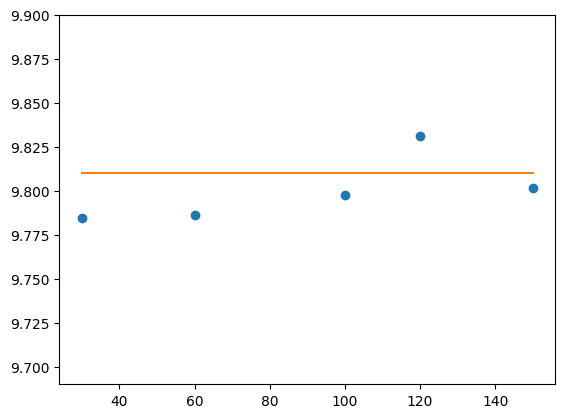

In [11]:
fig, ax = plt.subplots()
ax.plot(sample.index.get_level_values('l'), sample['g', 'mean'], 'o',
        sample.index.get_level_values('l'), np.ones_like(sample.index.get_level_values('l')) * 9.81)
ax.set(ylim=[9.69,9.90])
fig.show()

## Misura di ta
Faccio l'analisi dati del tempo caratteristico del pendolo, andando a prendere angoli grandi per studiare lo smorzamento.

[0.00368189 0.00063874]
[ 271.59928235 1565.57523129]


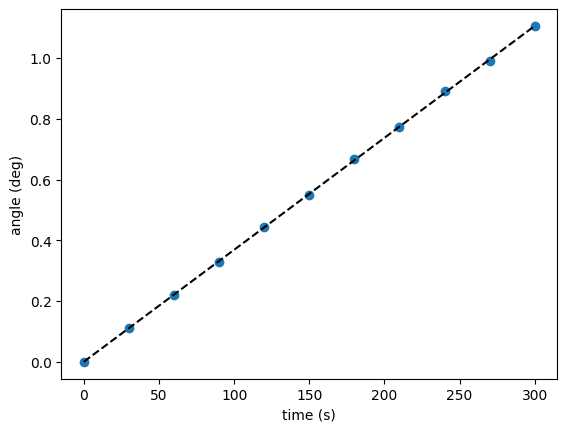

In [12]:
ta = pd.read_csv('ta.csv', delimiter=' ')

x = ta['t']
y = np.log(ta['theta'][0] / ta['theta'])

coef = np.polyfit(x, y, 1)
print(coef)
print(1 / coef)

fig, ax = plt.subplots()
ax.plot(x, y, 'o', x, np.poly1d(coef)(x), '--k')
ax.set(xlabel='time (s)',
       ylabel='angle (deg)')
plt.show()

# Gaussian model of the data

\section{Confronto istogramma e gaussiana}
Gli errori sul campione di cento misure sono di tipo statistico e per questo ci aspettiamo seguano un andamento gaussiano. Pertanto saranno modellati da una funzione di distribuzione normale a due parametri $\sigma$ e $\mu$ secondo la seguente formula:

\begin{equation}
    f(\tau) = \dfrac{1}{\sqrt{2\pi\sigma^2}}\exp\left[-\dfrac{\left(\tau - \mu \right)^2}{2\sigma^2}\right]
\end{equation}

Dal campione è possibile ricavare la stima migliore dei due parametri $\sigma^*$ $\mu^*$ che descrivono la distribuzione. 
\begin{equation}
    \begin{cases}
        \mu^* = \dfrac{1}{100} \sum_{i=1}^{100} \tau_i = 10.04\,\mathrm{s}\\[3ex]
        \sigma^* = \sqrt{\dfrac{1}{100-1} \sum_{i=1}^{100} (\tau_i - \bar{\tau})^2}
    \end{cases}
\end{equation}

Trovati questi parametri bisogna confrontare che i dati e il modello siano compatibili, per farlo vediamo se gli eventi in ogni bin sono compatibili con quelli predetti dalla gaussiana. Il numero di eventi in ogni bin segue una distribuzione binomiale dove il numero di eventi attesi è $n_{tot}f(\tau_i)\Delta\tau$ dove $n_{tot}$ è il numero totale di eventi, $f(\tau_i)$ è il valore della gaussiana nella metà del bine e $\Delta\tau$ è ampiezza del bin.

L'intervallo $\Delta\tau$ può essere scelto in maniera arbitraria ma esistono delle scelte canoniche, abbiamo adottato una di queste, ovvero il criterio della radice

\begin{equation}
    \Delta\tau = \frac{\left| max(\tau_i) - min(\tau_i)\right|}{\sqrt{100}}\approx 0.02\,s
\end{equation}

La deviazione standard del numero di eventi nel bin è data dalla formula per valida per la distribuzione binomiale:

\begin{equation}
    \sigma_{n_i} = \sqrt{n_{tot}\left(1-\dfrac{n_i}{n_{tot}}\right)} \approx \sqrt{n_i}
\end{equation}

dove l'ultima approssimazione fatta è giustificata poiché troviamo $n_{tot}\gg n_i$. Le misure sono compatibili quando il loro valore è entro tre sigma da quello atteso:

\begin{equation}
    \left| n_i - n_{tot}f(\tau_i)\Delta\tau\right| < 3\sigma_{n_i}
\end{equation}

In [44]:
filtered = tof[tof['l'] == 100][tof['theta'] == 5].loc[:, 'tau']

mu = filtered.mean()
sig = filtered.std(ddof=1)
dtau = abs(filtered.max() - filtered.min()) / 10

print(filtered.tail())
print(f'mu {mu}, sigma {sig : .3f}, dtau {dtau : .3f}')

95     9.96
96    10.07
97    10.02
98    10.02
99    10.06
Name: tau, dtype: float64
mu 10.0366, sigma  0.034, dtau  0.018


/tmp/ipykernel_4669/1327418776.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered = tof[tof['l'] == 100][tof['theta'] == 5].loc[:, 'tau']


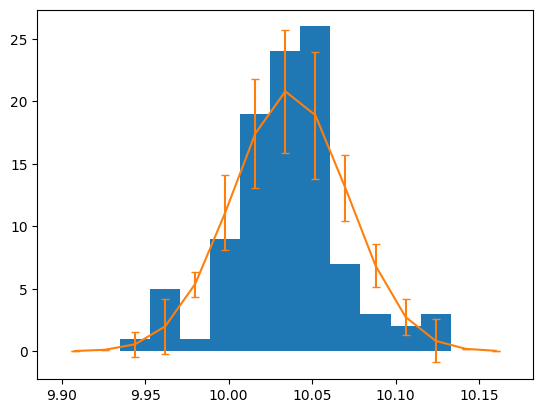

In [74]:
from scipy.stats.distributions import norm
mids = lambda x : (x[:-1] + x[1:]) /2

x = np.arange(mu - 4*sig, mu + 4*sig, dtau)

counts, *_ = plt.hist(filtered.values , x)

_ = plt.errorbar(mids(x), norm.pdf(mids(x), mu, sig)* 100 * dtau, yerr = np.sqrt(counts),
             capsize=3)

Adesso genero gli elementi che andranno a popolare la tabella in formato latex:

In [103]:
for i in range(len(counts)):

    #               bin edges                   counts          expected                         sigma
    print(f"({x[i]:.2f}, {x[i+1]:.2f}) "
          f"& {counts[i]:.0f} " 
          f"& {(norm.pdf(mids(x)[i], mu, sig)* 100 * dtau):.2f} " 
          f"& {np.sqrt(counts[i]) : .2f} "
          f"& {3*np.sqrt(counts[i]) : .2f}\\\\")

(9.90, 9.92) & 0 & 0.02 &  0.00&  0.00\\
(9.92, 9.93) & 0 & 0.12 &  0.00&  0.00\\
(9.93, 9.95) & 1 & 0.56 &  1.00&  3.00\\
(9.95, 9.97) & 5 & 1.98 &  2.24&  6.71\\
(9.97, 9.99) & 1 & 5.38 &  1.00&  3.00\\
(9.99, 10.01) & 9 & 11.10 &  3.00&  9.00\\
(10.01, 10.02) & 19 & 17.43 &  4.36&  13.08\\
(10.02, 10.04) & 24 & 20.80 &  4.90&  14.70\\
(10.04, 10.06) & 26 & 18.89 &  5.10&  15.30\\
(10.06, 10.08) & 7 & 13.05 &  2.65&  7.94\\
(10.08, 10.10) & 3 & 6.86 &  1.73&  5.20\\
(10.10, 10.11) & 2 & 2.74 &  1.41&  4.24\\
(10.11, 10.13) & 3 & 0.83 &  1.73&  5.20\\
(10.13, 10.15) & 0 & 0.19 &  0.00&  0.00\\
(10.15, 10.17) & 0 & 0.03 &  0.00&  0.00\\
